## imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


## Generate DBSCAN-friendly dataset (non-linear clusters + noise)

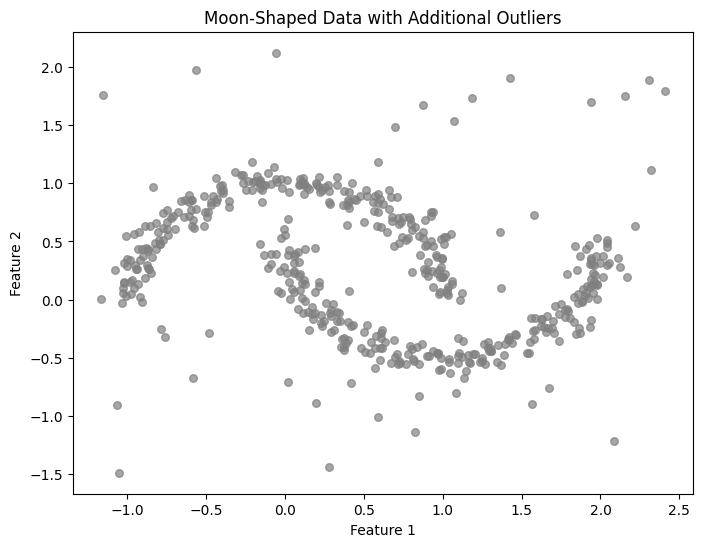

In [9]:
# Generate moon-shaped data with noise
np.random.seed(42)
X, _ = make_moons(n_samples=450, noise=0.07)  # slightly fewer points for moons

# Generate random outliers (uniform noise)
outliers = np.random.uniform(low=-1.5, high=2.5, size=(50, 2))  # 50 outliers

# Combine moons + outliers
X = np.vstack([X, outliers])

# Visualize data with more outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='gray', s=30, alpha=0.7)
plt.title("Moon-Shaped Data with Additional Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Apply DBSCAN

In [10]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X)


## Visualize DBSCAN Clusters

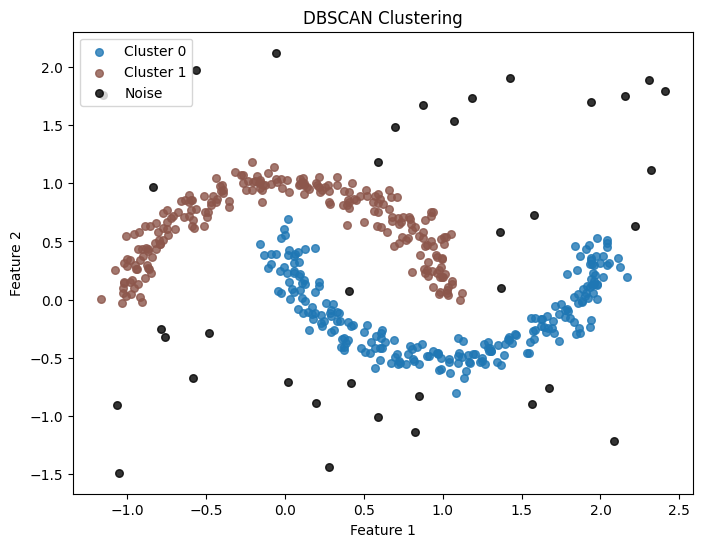

In [11]:
# Colors for clusters, noise points as black
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise
        col = 'black'
        label_name = "Noise"
    else:
        col = color
        label_name = f"Cluster {label}"
    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                color=col, s=30, alpha=0.8, label=label_name)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Show cluster counts and noise

In [12]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 2
Estimated number of noise points: 36


## DBSCAN with core/border/noise visualization

/tmp/ipython-input-3981683002.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy_border[:, 0], xy_border[:, 1],


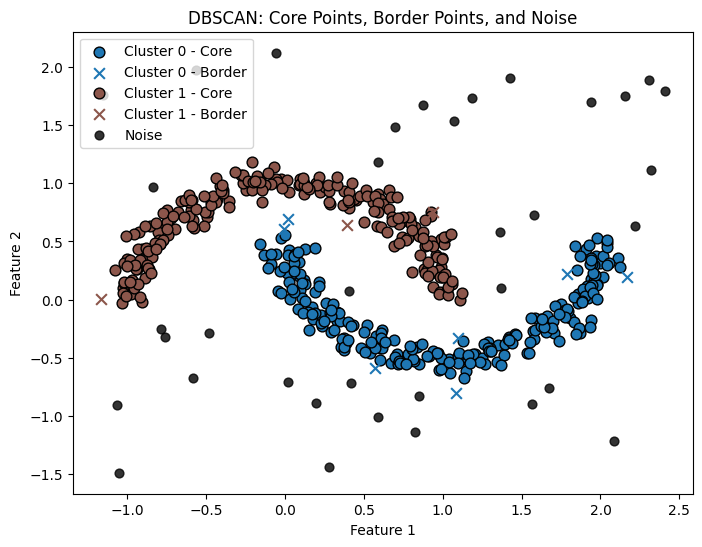

In [13]:
# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Unique cluster labels
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
                    color='black', s=40, alpha=0.8, label='Noise')
    else:
        # Core points
        class_member_mask = (labels == label)
        xy_core = X[class_member_mask & core_samples_mask]
        plt.scatter(xy_core[:, 0], xy_core[:, 1],
                    color=color, s=60, marker='o', edgecolor='k', label=f'Cluster {label} - Core')

        # Border points
        xy_border = X[class_member_mask & ~core_samples_mask]
        plt.scatter(xy_border[:, 0], xy_border[:, 1],
                    color=color, s=60, marker='x', edgecolor='k', label=f'Cluster {label} - Border')

plt.title("DBSCAN: Core Points, Border Points, and Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
